In [ ]:
import numpy as np
import cv2

print(cv2.__version__)

4.8.0


In [ ]:
%mkdir model/
%cd model

!wget https://raw.githubusercontent.com/georgiosouzounis/face-detection-ssd-caffe/main/model/deploy.prototxt.txt

!wget https://github.com/georgiosouzounis/face-detection-ssd-caffe/raw/main/model/res10_300x300_ssd_iter_140000.caffemodel

# move out of the directory once the model is loaded
%cd ..

/content/model
--2024-04-24 12:57:22--  https://raw.githubusercontent.com/georgiosouzounis/face-detection-ssd-caffe/main/model/deploy.prototxt.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28092 (27K) [text/plain]
Saving to: ‘deploy.prototxt.txt’

deploy.prototxt.txt 100%[===================>]  27.43K  --.-KB/s    in 0.007s  

2024-04-24 12:57:22 (3.63 MB/s) - ‘deploy.prototxt.txt’ saved [28092/28092]

--2024-04-24 12:57:22--  https://github.com/georgiosouzounis/face-detection-ssd-caffe/raw/main/model/res10_300x300_ssd_iter_140000.caffemodel
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.co

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
%cp drive/MyDrive/Colab_Notebooks/datasets/object_detection/macron.jpg .

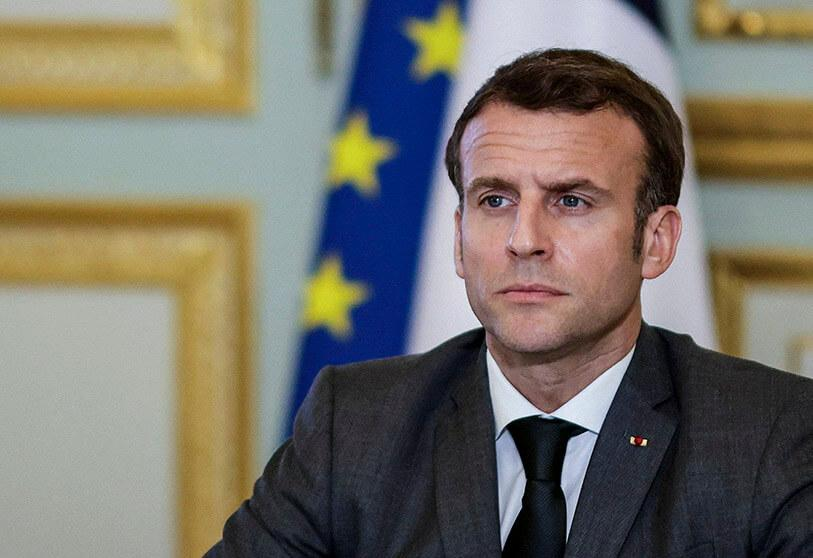

In [ ]:
test_img = "macron.jpg"

image = cv2.imread(test_img)
(h,w) = image.shape[:2]

from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [ ]:
model_cfg = "model/deploy.prototxt.txt"
model_weights = "model/res10_300x300_ssd_iter_140000.caffemodel"

# read the model
detector = cv2.dnn.readNetFromCaffe(model_cfg, model_weights)

In [ ]:
scalefactor = 1.0

new_size = (300,300)

blob = cv2.dnn.blobFromImage(image,scalefactor,new_size,(127.5,127.5,127.5), swapRB = True,crop = False)

detector.setInput(blob)

detections = detector.forward()
detections.shape

(1, 1, 200, 7)

In [ ]:
print(detections[0][0][0])

print(len(detections[0][0]))

[0.         1.         0.9996408  0.5665413  0.18484493 0.7850617
 0.6287232 ]
200


In [ ]:
confidence_threshold = 0.5

for i in range(0,detections.shape[2]):
  confidence = detections[0,0,i,2]

  if confidence > confidence_threshold:
    box = detections[0,0,i,3:7] * np.array([w,h,w,h])
    (startX,startY, endX, endY) = box.astype("int")

    cv2.rectangle(image, (startX,startY), (endX,endY), (0,0,255), 2)

    text = "confidence: {:.2f}%".format(confidence * 100)
    y = startY - 10 if startY - 10 > 10 else startY + 10
    cv2.putText(image, text, (startX,y), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0,0,255),2)

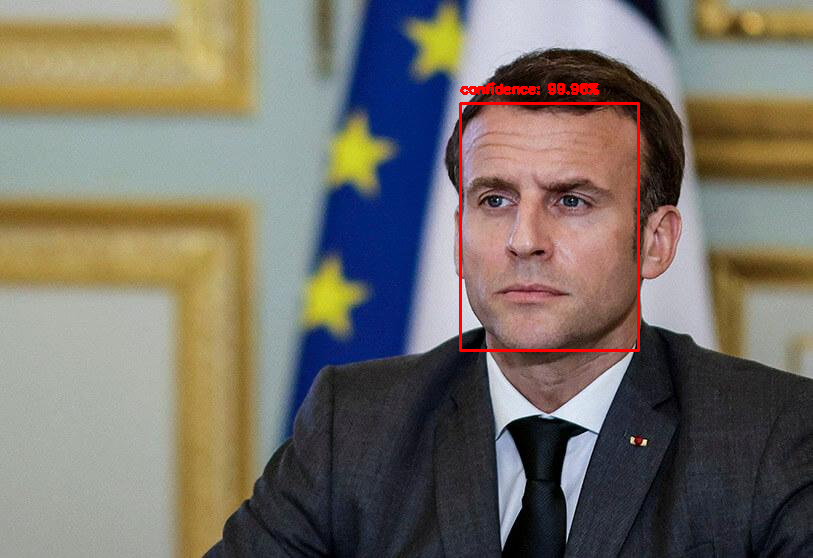

In [ ]:
cv2_imshow(image)